#Lab -6

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model, load_model, Sequential, save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


## Task 01

In [3]:
weather_data=pd.read_csv('/content/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_data.shape

(96453, 12)

In [5]:
weather_data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
weather_data=weather_data.fillna('')
weather_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

###Function for Onehot encoding from scracth
Using the function_onehot to encode the catogerical columns on the given data.

In [402]:
def function_onehot(input_dt):
  unq_vals=list(input_dt.unique())
  n=len(unq_vals)
  val_cols=[i for i in range(0,n)]
  op_dt=np.zeros((len(input_dt),n))
  j=0
  for i in input_dt:
    val=unq_vals.index(i)
    op_dt[j][val]=1
    j=j+1
  op_dt=pd.DataFrame(op_dt,columns=val_cols)
  return op_dt

In [10]:
import copy
cat_cols=['Summary','Precip Type']
new_data=pd.DataFrame()
for i in cat_cols:
  col_encoding=function_onehot(weather_data[i])
  new_data=pd.concat([new_data,col_encoding],axis=1)


In [11]:
new_data.head()

,Partly Cloudy,Mostly Cloudy,Overcast,Foggy,Breezy and Mostly Cloudy,Clear,Breezy and Partly Cloudy,Breezy and Overcast,Humid and Mostly Cloudy,Humid and Partly Cloudy,Windy and Foggy,Windy and Overcast,Breezy and Foggy,Windy and Partly Cloudy,Breezy,Dry and Partly Cloudy,Windy and Mostly Cloudy,Dangerously Windy and Partly Cloudy,Dry,Windy,Humid and Overcast,Light Rain,Drizzle,Windy and Dry,Dry and Mostly Cloudy,Breezy and Dry,Rain,rain,snow,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
new_data.shape

(96453, 30)

In [13]:
cat_cols.append('Daily Summary')
cat_cols.append('Formatted Date')
cat_cols.append('Loud Cover')
new_dt=weather_data.drop(cat_cols,axis=1)

In [14]:
new_dt.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [15]:
new_dt2=pd.concat([new_dt,new_data],axis=1)
new_dt2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Partly Cloudy,Mostly Cloudy,Overcast,Foggy,Breezy and Mostly Cloudy,Clear,Breezy and Partly Cloudy,Breezy and Overcast,Humid and Mostly Cloudy,Humid and Partly Cloudy,Windy and Foggy,Windy and Overcast,Breezy and Foggy,Windy and Partly Cloudy,Breezy,Dry and Partly Cloudy,Windy and Mostly Cloudy,Dangerously Windy and Partly Cloudy,Dry,Windy,Humid and Overcast,Light Rain,Drizzle,Windy and Dry,Dry and Mostly Cloudy,Breezy and Dry,Rain,rain,snow,
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
new_dt2.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Partly Cloudy,Mostly Cloudy,Overcast,Foggy,Breezy and Mostly Cloudy,Clear,Breezy and Partly Cloudy,Breezy and Overcast,Humid and Mostly Cloudy,Humid and Partly Cloudy,Windy and Foggy,Windy and Overcast,Breezy and Foggy,Windy and Partly Cloudy,Breezy,Dry and Partly Cloudy,Windy and Mostly Cloudy,Dangerously Windy and Partly Cloudy,Dry,Windy,Humid and Overcast,Light Rain,Drizzle,Windy and Dry,Dry and Mostly Cloudy,Breezy and Dry,Rain,rain,snow,
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956,0.329000,0.291271,0.172073,0.074109,0.005350,0.112905,0.004002,0.005474,0.000415,0.000176,0.000041,0.000467,0.000363,0.000695,0.000560,0.000892,0.000363,0.00001,0.000353,0.000083,0.000073,0.000653,0.000404,0.00001,0.000145,0.00001,0.000104,0.883581,0.111059,0.005360
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906,0.469852,0.454351,0.377446,0.261949,0.072946,0.316478,0.063135,0.073785,0.020360,0.013275,0.006440,0.021595,0.019046,0.026347,0.023655,0.029847,0.019046,0.00322,0.018772,0.009107,0.008519,0.025549,0.020104,0.00322,0.012047,0.00322,0.010182,0.320729,0.314207,0.073017
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


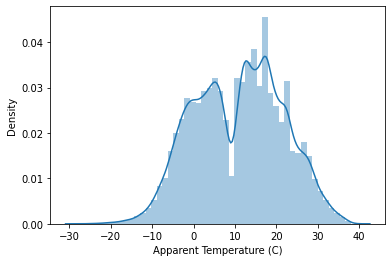

In [17]:
sns.distplot(new_dt2['Apparent Temperature (C)'])
plt.show()

In [18]:
valid_cols=list(new_dt.columns)
valid_cols.remove('Apparent Temperature (C)')


In [19]:
X = new_dt2.drop('Apparent Temperature (C)',axis=1)
y = new_dt2['Apparent Temperature (C)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

### Normalizing data

In [28]:
x_mean=X_train[valid_cols].mean(axis=0)
x_std=X_train[valid_cols].std(axis=0)


In [ ]:
X_train[valid_cols]= (X_train[valid_cols]-x_mean)/x_std
X_test[valid_cols] = (X_test[valid_cols]-x_mean)/x_std

In [32]:
X_train.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Partly Cloudy,Mostly Cloudy,Overcast,Foggy,Breezy and Mostly Cloudy,Clear,Breezy and Partly Cloudy,Breezy and Overcast,Humid and Mostly Cloudy,Humid and Partly Cloudy,Windy and Foggy,Windy and Overcast,Breezy and Foggy,Windy and Partly Cloudy,Breezy,Dry and Partly Cloudy,Windy and Mostly Cloudy,Dangerously Windy and Partly Cloudy,Dry,Windy,Humid and Overcast,Light Rain,Drizzle,Windy and Dry,Dry and Mostly Cloudy,Breezy and Dry,Rain,rain,snow,
24935,-0.208859,0.999247,-0.674932,0.219965,-1.540815,0.253707,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68393,-1.133293,0.948036,0.555202,1.404208,-0.085554,0.095409,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
573,0.046277,-0.844367,-0.199653,-0.264922,-0.085554,0.094815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95569,-1.050577,0.743190,-0.875295,0.546331,-2.466191,0.186568,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79830,1.070318,0.435921,-0.474569,-0.199648,-0.150829,0.023432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
X_train.shape

(67517, 36)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(36,activation='relu',input_dim=36))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=300,epochs=50)

Epoch 1/50
226/226 [==============================] - 2s 5ms/step - loss: 94.3691 - val_loss: 3.8584
Epoch 2/50
226/226 [==============================] - 1s 4ms/step - loss: 4.0737 - val_loss: 1.5250
Epoch 3/50
226/226 [==============================] - 1s 4ms/step - loss: 3.0995 - val_loss: 1.1401
Epoch 4/50
226/226 [==============================] - 1s 4ms/step - loss: 2.4986 - val_loss: 0.8211
Epoch 5/50
226/226 [==============================] - 1s 4ms/step - loss: 2.0787 - val_loss: 0.5925
Epoch 6/50
226/226 [==============================] - 1s 5ms/step - loss: 1.8162 - val_loss: 0.4766
Epoch 7/50
226/226 [==============================] - 1s 5ms/step - loss: 1.6196 - val_loss: 0.4397
Epoch 8/50
226/226 [==============================] - 1s 4ms/step - loss: 1.4720 - val_loss: 0.3754
Epoch 9/50
226/226 [==============================] - 1s 4ms/step - loss: 1.3301 - val_loss: 0.3699
Epoch 10/50
226/226 [==============================] - 1s 4ms/step - loss: 1.1810 - val_loss: 0.499

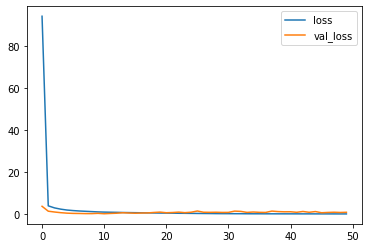

In [44]:
losses = pd.DataFrame(model.history.history)
losses.plot()

###New function defined for Mean Squared error

In [52]:
def func_mean_sq_error(predicted_y,labels):
  m=predicted_y.shape[0]
  predicted_y=np.array(predicted_y).reshape(m,1)
  labels=np.array(labels).reshape(m,1)
  Loss= np.round(np.dot((predicted_y- labels).transpose(),predicted_y-labels),6)
  Mean_sq_error = Loss[0][0]/(m)
  return Mean_sq_error

In [53]:
predictions = model.predict(X_test)
print("Mean squared error :",  func_mean_sq_error(y_test,predictions))


Mean squared error : 1.0039461447332043


## Task 02

###2.1 SubTask

In [54]:
import tensorflow as tf
cifar_dt=tf.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test)=cifar_dt.load_data()


170508288/170498071 [==============================] - 11s 0us/step


**Preparing a preprocessed normalized data**

In [55]:
def preprocess(sample):
    image = np.array(sample)
    image = image/255.
    return image

In [56]:
X_train = np.asarray(X_train)
X_train = np.asarray([preprocess(i) for i in X_train])
Y_train = np.asarray(Y_train)

In [57]:
X_test = np.asarray(X_test)
X_test = np.asarray([preprocess(i) for i in X_test])
Y_test = np.asarray(Y_test)

In [58]:
print("Train shapes: ", X_train.shape, Y_train.shape)
print("Test shapes: ", X_test.shape, Y_test.shape)

Train shapes:  (50000, 32, 32, 3) (50000, 1)
Test shapes:  (10000, 32, 32, 3) (10000, 1)


In [66]:
cifar_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='softmax')
])


In [67]:
cifar_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [68]:
h3=cifar_model.fit(X_train,Y_train,validation_split=0.2,epochs=50)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9375 - sparse_categorical_accuracy: 0.2903 - val_loss: 1.7820 - val_sparse_categorical_accuracy: 0.3535
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7590 - sparse_categorical_accuracy: 0.3669 - val_loss: 1.7286 - val_sparse_categorical_accuracy: 0.3745
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6947 - sparse_categorical_accuracy: 0.3901 - val_loss: 1.6658 - val_sparse_categorical_accuracy: 0.4043
Epoch 4/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6482 - sparse_categorical_accuracy: 0.4057 - val_loss: 1.6814 - val_sparse_categorical_accuracy: 0.3923
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6241 - sparse_categorical_accuracy: 0.4156 - val_loss: 1.6943 - val_sparse_categorical_accuracy: 0.3966
Epoch 6/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5994 - spars

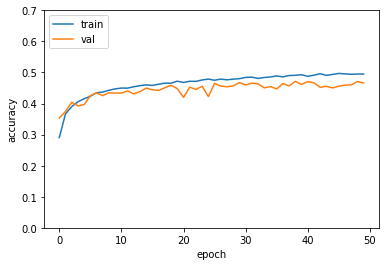

In [69]:
plt.plot(h3.history['sparse_categorical_accuracy'])
plt.plot(h3.history['val_sparse_categorical_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,0.7)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####Defining function for confusion matrix and accuracy metrics for classification

In [80]:
predictions = cifar_model.predict(X_test)


In [380]:
def get_class(pred,n=1000):
  op_val=[]
  for i in pred:
    op_val.append(list(np.where(i ==i.max())))
  op_val=np.array(op_val).reshape(n, 1)
  return op_val

In [109]:
pred_class=get_class(predictions)

In [122]:
number_of_classes=10
classes=[i for i in range(0,10)]
conf_matrix = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,columns=classes)

for k in list(zip(Y_test ,pred_class)):
    conf_matrix.loc[k[0][0], k[1][0]] += 1

In [123]:
conf_matrix 

,0,1,2,3,4,5,6,7,8,9
0,555,65,52,21,25,8,18,29,168,59
1,32,674,15,24,11,23,15,22,67,117
2,100,43,334,67,130,83,94,85,47,17
3,44,47,94,246,56,238,117,61,52,45
4,70,16,153,64,364,55,110,119,30,19
5,31,38,99,136,56,394,73,91,53,29
6,17,38,81,84,136,69,500,32,21,22
7,58,44,49,54,86,63,28,545,20,53
8,117,83,16,22,17,25,6,7,642,65
9,48,241,15,37,9,17,29,53,74,477


In [130]:
def total_accuracy(con_mat):
  total_samples=con_mat.to_numpy().sum()
  n_clases=con_mat.shape[0]
  correct_cls=0
  for i in range(0,n_clases):
    correct_cls+=con_mat[i][i]
  return correct_cls*100/total_samples



In [448]:
print("Overall accuracy:",total_accuracy(conf_matrix),"%")

Overall accuracy: 52.3%


---

### 2.2 SubTask

In [160]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [171]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Preparing a preprocessed normalized data**

In [172]:
X_train = X_train / 255.0

In [173]:
X_test = X_test / 255.0

Images display 

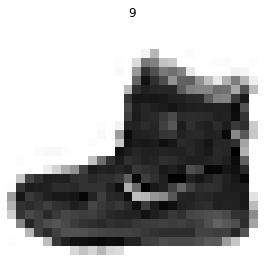

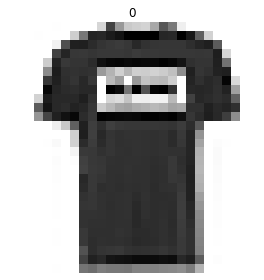

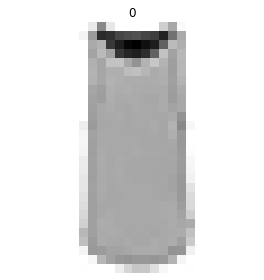

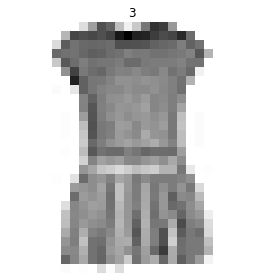

In [174]:
for i in range(4):
      plt.imshow(X_train[i], cmap = 'binary')
      plt.title(y_train[i])
      plt.axis('off')
      plt.tight_layout()
      plt.show()

In [175]:
X_train = X_train.reshape(-1, 28*28)

In [176]:
X_test.shape

(10000, 28, 28)

In [177]:
X_test = X_test.reshape(-1, 28*28)

In [229]:
tf.random.set_seed(5)
fashion_model = tf.keras.models.Sequential()
fashion_model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
fashion_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
fashion_model.add(tf.keras.layers.Dropout(0.2))
fashion_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [230]:
fashion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [231]:
h4=fashion_model.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1208 - sparse_categorical_accuracy: 0.5875 - val_loss: 0.6959 - val_sparse_categorical_accuracy: 0.7341
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7099 - sparse_categorical_accuracy: 0.7344 - val_loss: 0.5883 - val_sparse_categorical_accuracy: 0.7809
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6265 - sparse_categorical_accuracy: 0.7687 - val_loss: 0.5398 - val_sparse_categorical_accuracy: 0.8027
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5840 - sparse_categorical_accuracy: 0.7884 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8129
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5476 - sparse_categorical_accuracy: 0.8024 - val_loss: 0.4856 - val_sparse_categorical_accuracy: 0.8221
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5230 - spars

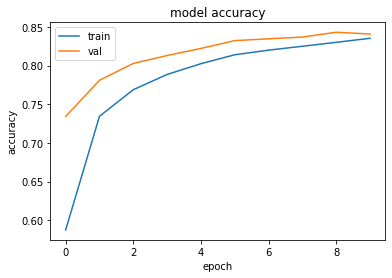

In [232]:
plt.plot(h4.history['sparse_categorical_accuracy'])
plt.plot(h4.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [233]:
fash_pred = fashion_model.predict(X_test)


In [234]:
fash_pred

array([[4.2742300e-08, 5.9017002e-10, 1.3094268e-09, ..., 1.8529099e-01,
        1.9002930e-03, 7.6884407e-01],
       [7.9735310e-04, 5.1144507e-06, 8.4291005e-01, ..., 6.4744095e-17,
        2.6931887e-04, 3.5858386e-15],
       [4.1844246e-06, 9.9919981e-01, 3.5611067e-06, ..., 2.4466398e-10,
        9.2061497e-12, 7.1072953e-10],
       ...,
       [1.8330663e-03, 2.0484364e-07, 7.5260272e-05, ..., 1.5125054e-05,
        9.6917433e-01, 3.8884102e-07],
       [2.2287168e-05, 9.9734253e-01, 1.5214437e-05, ..., 4.5640065e-09,
        1.7677680e-10, 1.5675260e-08],
       [1.0907507e-05, 9.5270929e-07, 6.0798302e-06, ..., 2.9253574e-02,
        8.3669014e-03, 1.1208090e-03]], dtype=float32)

In [235]:
pred_class2=get_class(fash_pred)

In [236]:
number_of_classes=10
classes=[i for i in range(0,10)]
conf_matrix2 = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,columns=classes)

for k in list(zip(y_test ,pred_class2)):
    conf_matrix2.loc[k[0], k[1][0]] += 1

In [237]:
conf_matrix2

,0,1,2,3,4,5,6,7,8,9
0,110,131,78,58,94,117,94,103,125,90
1,114,130,91,64,77,79,115,111,123,96
2,111,139,85,73,96,92,104,106,109,85
3,114,132,77,80,84,94,113,108,113,85
4,110,123,97,82,87,117,98,98,100,88
5,86,145,98,80,95,95,97,110,107,87
6,125,107,92,83,86,106,88,122,111,80
7,91,128,99,72,102,94,94,87,129,104
8,105,131,84,77,91,89,97,111,131,84
9,106,123,107,86,78,92,90,88,126,104


In [239]:
print(total_accuracy(conf_matrix2))

9.97


In [ ]:
test_loss, test_accuracy = fashion_model.evaluate(X_test, y_test)

In [242]:

print("Test accuracy:",test_accuracy*100,"%")

Test accuracy: 82.70999789237976 %


###2.3 SubTask

In [308]:
zoo_data=pd.read_csv('/content/datasets_586_1114_zoo.csv')
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [309]:
zoo_data.shape

(101, 18)

In [310]:
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [311]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

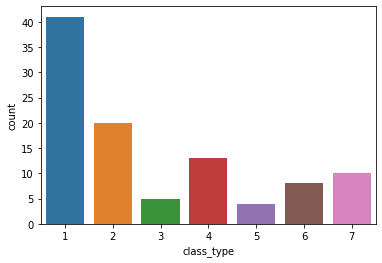

In [312]:
sns.countplot(data=zoo_data,x='class_type')
plt.show()

In [313]:
zoo_data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

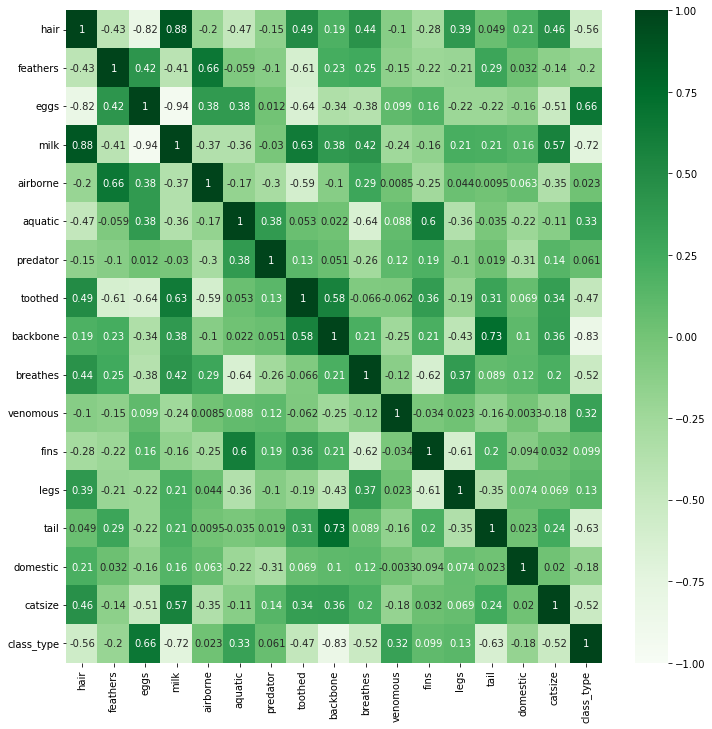

In [314]:
correlations = zoo_data.corr()

fig = plt.figure(figsize=(12,12))
sns.heatmap(correlations,vmin=-1, vmax=1,fmt='.2g',cmap='Greens',annot=True)

plt.show()

#### Encoding the target column

In [317]:
zoo_data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [403]:

col_encoding=function_onehot(zoo_data['class_type'])
target=pd.DataFrame(col_encoding)

In [404]:
#target=pd.DataFrame(target,columns=[i for i in range(0,7)])
target.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
X = zoo_data.drop(['animal_name','class_type'],axis=1)
y = target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [420]:
X_train.shape

(70, 16)

In [421]:
Y_train.shape

(70, 7)

In [422]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0


In [423]:

zoo_model= Sequential()
zoo_model.add(Dense(units = 16, activation = 'relu',  input_dim = 16))
zoo_model.add(Dense(units = 128, activation = 'relu'))
zoo_model.add(Dense(units = 128, activation = 'relu'))
zoo_model.add(Dense(units=7, activation='softmax'))


In [424]:
zoo_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [425]:
tf.random.set_seed(2)
h7=zoo_model.fit(X_train, Y_train.values, epochs =100,validation_split=0.1)


Epoch 1/100
2/2 [==============================] - 1s 224ms/step - loss: 1.9425 - categorical_accuracy: 0.2698 - val_loss: 1.7633 - val_categorical_accuracy: 0.4286
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 1.7257 - categorical_accuracy: 0.6349 - val_loss: 1.7199 - val_categorical_accuracy: 0.4286
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 1.5341 - categorical_accuracy: 0.5873 - val_loss: 1.7250 - val_categorical_accuracy: 0.4286
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 1.4337 - categorical_accuracy: 0.5873 - val_loss: 1.7614 - val_categorical_accuracy: 0.4286
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 1.3363 - categorical_accuracy: 0.5873 - val_loss: 1.7763 - val_categorical_accuracy: 0.4286
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 1.2715 - categorical_accuracy: 0.5873 - val_loss: 1.7577 - val_categorical_accuracy: 0.4286
Epoch 7/100
2/2

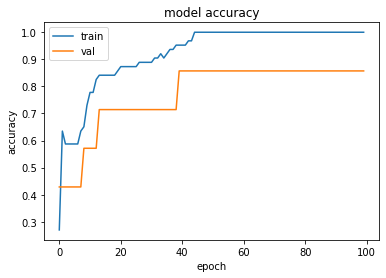

In [426]:
plt.plot(h7.history['categorical_accuracy'])
plt.plot(h7.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [427]:
pred_y= zoo_model.predict(X_test)
pred_class=get_class(pred_y,Y_test.shape[0])

####Defining function for confusion matrix and accuracy metrics for classification

In [445]:

number_of_classes=7
classes=[i for i in range(0,7)]
conf_matrix3= pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,columns=classes)

for k in list(zip(get_class(np.array(Y_test).reshape(Y_test.shape[0],7),Y_test.shape[0]) ,pred_class)):
    conf_matrix3.loc[k[0], k[1][0]] += 1

In [446]:
conf_matrix3

,0,1,2,3,4,5,6
0,12,0,0,0,0,0,0
1,0,2,0,0,0,0,0
2,0,0,8,0,0,0,0
3,0,0,0,2,0,0,2
4,0,0,0,0,2,0,0
5,1,0,0,0,0,1,0
6,0,0,0,0,0,0,1


In [447]:

print("Test accuracy:",total_accuracy(conf_matrix3))

Test accuracy: 90.3225806451613
